# Maps of Measured and Calculated Hysteresis

### Import Packages

In [1]:
import climlab
import numpy as np
import phys
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm
from IPython.display import clear_output

### Import Calculated Heights file from Cluster

In [11]:
path = './Data/'

ts_2m = xr.open_dataset(path + 'ts_2m.nc', decode_times=False)
temp = xr.open_dataset(path + 'temp.nc', decode_times=False)
olrs = xr.open_dataset(path + 'olrs_ltmm.nc', decode_times=False)
heights_calc_raw = xr.open_dataset(path + 'heights_calculated.nc', decode_times=False)
heights_meas_raw = xr.open_dataset(path + 'heights_measured.nc', decode_times=False)
heights_calc_allsky = xr.open_dataset('./Data/heights_calculated_allsky.nc', decode_times=False)

lats = temp.lat.values
lons = temp.lon.values
lon_long = temp.lon.values

heights_frac = np.zeros((len(lats), len(lons)))
heights_frac, lons = add_cyclic_point(heights_frac, coord=lons)
lons = temp.lon.values

heights_frac_allsky = np.zeros((len(lats), len(lons)))
heights_frac_allsky, lon_long = add_cyclic_point(heights_frac_allsky, coord=lon_long)

for i in range(len(lats)):
    for j in range(len(lons)):
        heights_frac[i,j] = heights_meas_raw.height.values[i,j] * 100 / olrs.sel(lat=lats[i], lon=lons[j]).olr.values[0]
        heights_frac_allsky[i,j] = heights_calc_allsky.height.values[i,j] * 100 / olrs.sel(lat=lats[i], lon=lons[j]).olr.values[0]

heights_calc[:,len(lons)] = heights_calc[:,0]
heights_calc = np.flip(heights_calc, axis=0)
    
heights_meas[:,len(lons)] = heights_meas[:,0]
#heights_meas = np.flip(heights_meas, axis=0)

### Plotting Observed Hysteresis

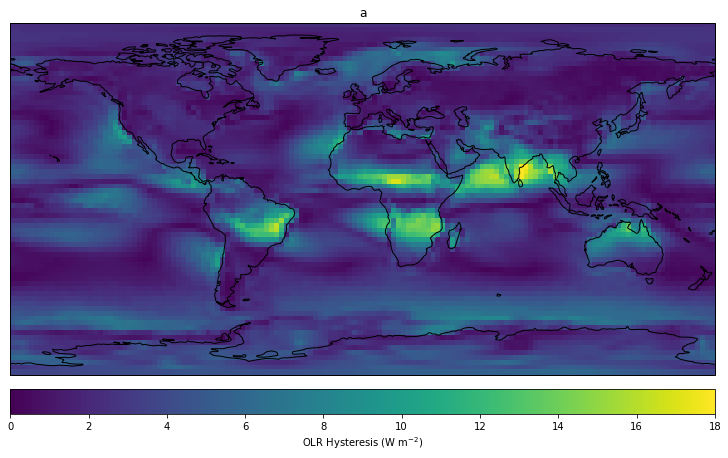

In [5]:
widths = [1]
fig = plt.figure(figsize=(10,7),constrained_layout=True)
gs = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths)    

ax1 = fig.add_subplot(gs[0], projection=ccrs.PlateCarree())
ax1.coastlines()
C1 = ax1.pcolor(lon_long, lats, heights_meas_raw.height.values, transform=ccrs.PlateCarree())
#if samescale:
C1.set_clim(vmin=0,vmax=18)
ax1.set_title('a')
#ax1.set_xticks([lon_min, lon_min*0.5+lon_max*0.5, lon_max], crs=ccrs.PlateCarree())
#ax1.set_yticks([lat_min, lat_min*0.5+lat_max*0.5, lat_max], crs=ccrs.PlateCarree())
#lon_formatter = LongitudeFormatter(zero_direction_label=True)
#lat_formatter = LatitudeFormatter()
#ax1.xaxis.set_major_formatter(lon_formatter)
#ax1.yaxis.set_major_formatter(lat_formatter)
fig.colorbar(C1, ax=ax1, label='OLR Hysteresis (W m$^{-2}$)',fraction=0.3, orientation="horizontal")

path = '/Users/richa/OneDrive - Imperial College London/Documents/MIT/Project/Python/Figures/Cluster/'
#plt.savefig(path + 'Calculated Hysteresis single.png', bbox_inches='tight')

### Fractional Hysteresis

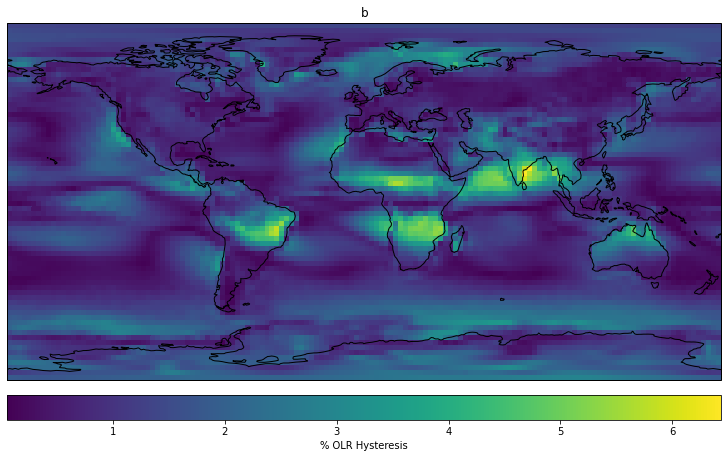

In [22]:
widths = [1]
fig = plt.figure(figsize=(10,7),constrained_layout=True)
gs = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths)    

#maxheight = 18

ax1 = fig.add_subplot(gs[0], projection=ccrs.PlateCarree())
ax1.coastlines()
C1 = ax1.pcolor(lon_long, lats, heights_frac, transform=ccrs.PlateCarree())
#if samescale:
#C1.set_clim(vmin=0,vmax=maxheight)
ax1.set_title('b')
#ax1.set_xticks([lon_min, lon_min*0.5+lon_max*0.5, lon_max], crs=ccrs.PlateCarree())
#ax1.set_yticks([lat_min, lat_min*0.5+lat_max*0.5, lat_max], crs=ccrs.PlateCarree())
#lon_formatter = LongitudeFormatter(zero_direction_label=True)
#lat_formatter = LatitudeFormatter()
#ax1.xaxis.set_major_formatter(lon_formatter)
#ax1.yaxis.set_major_formatter(lat_formatter)
fig.colorbar(C1, ax=ax1, label='% OLR Hysteresis',fraction=0.3, orientation="horizontal")

path = '/Users/richa/OneDrive - Imperial College London/Documents/MIT/Project/Python/Figures/'
#plt.savefig(path + 'Fractional Calculated Hysteresis single.png', bbox_inches='tight')

### Calculated Hysteresis

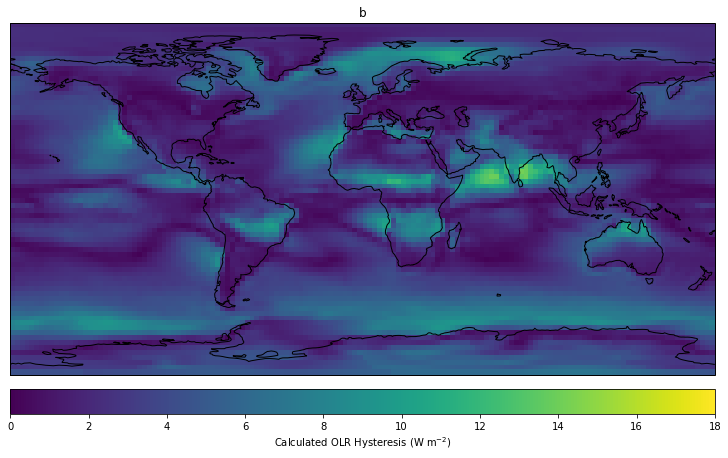

In [8]:
# --------------------------------
# Plotting the Reanalysis OLR Map
# --------------------------------

widths = [1,1]
fig = plt.figure(figsize=(10,7),constrained_layout=True)
gs = fig.add_gridspec(ncols=1, nrows=1)    

ax2 = fig.add_subplot(gs[0], projection=ccrs.PlateCarree())
ax2.coastlines()
C2 = ax2.pcolor(lon_long, lats, np.flip(heights_calc_raw.height.values, axis=0), transform=ccrs.PlateCarree())
#if samescale:
C2.set_clim(vmin=0,vmax=18)
ax2.set_title('b')
#ax2.set_xticks([lon_min, lon_min*0.5+lon_max*0.5, lon_max], crs=ccrs.PlateCarree())
#ax2.set_yticks([lat_min, lat_min*0.5+lat_max*0.5, lat_max], crs=ccrs.PlateCarree())
#lon_formatter = LongitudeFormatter(zero_direction_label=True)
#lat_formatter = LatitudeFormatter()
#ax2.xaxis.set_major_formatter(lon_formatter)
#ax2.yaxis.set_major_formatter(lat_formatter)
fig.colorbar(C2, ax=ax2, label='Calculated OLR Hysteresis (W m$^{-2}$)',fraction=0.3, orientation="horizontal")

path = '/Users/richa/OneDrive - Imperial College London/Documents/MIT/Project/Python/Figures/'
#plt.savefig(path + 'Calc Hysteresis.png', bbox_inches='tight')

### Difference Between Calculated and Measured Hysteresis

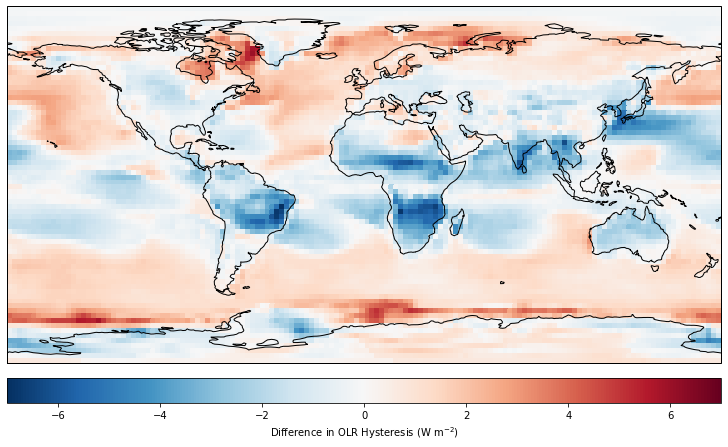

In [29]:
diferencemap = heights_meas.copy()

for i in range(len(heights_meas[:,0])):
    for j in range(len(heights_meas[0,:])):
        diferencemap[i,j] = 0
        diferencemap[i,j] = heights_calc[i,j] - heights_meas[i,j]

widths = [1,1]
fig = plt.figure(figsize=(10,7),constrained_layout=True)
gs = fig.add_gridspec(ncols=1, nrows=1)    

ax2 = fig.add_subplot(gs[0], projection=ccrs.PlateCarree())
ax2.coastlines()
C2 = ax2.pcolor(lon_long, lats, diferencemap, transform=ccrs.PlateCarree(), cmap=cm.RdBu_r)
#if samescale:
C2.set_clim(vmin=-7,vmax=7)
#ax2.set_title('Difference')
#ax2.set_xticks([lon_min, lon_min*0.5+lon_max*0.5, lon_max], crs=ccrs.PlateCarree())
#ax2.set_yticks([lat_min, lat_min*0.5+lat_max*0.5, lat_max], crs=ccrs.PlateCarree())
#lon_formatter = LongitudeFormatter(zero_direction_label=True)
#lat_formatter = LatitudeFormatter()
#ax2.xaxis.set_major_formatter(lon_formatter)
#ax2.yaxis.set_major_formatter(lat_formatter)
fig.colorbar(C2, ax=ax2, label='Difference in OLR Hysteresis (W m$^{-2}$)',fraction=0.3, orientation="horizontal")

path = '/Users/richa/OneDrive - Imperial College London/Documents/MIT/Project/Python/Figures/'
#plt.savefig(path + 'Diff Hysteresis.png', bbox_inches='tight')

### All sky Hysteresis

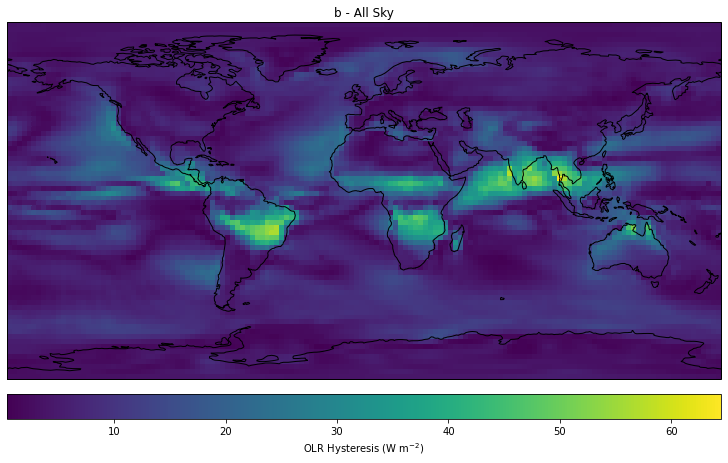

In [3]:
# --------------------------------
# Plotting the Reanalysis OLR Map
# --------------------------------

widths = [1]
fig = plt.figure(figsize=(10,7),constrained_layout=True)
gs = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths)    

#maxheight = 18

ax1 = fig.add_subplot(gs[0], projection=ccrs.PlateCarree())
ax1.coastlines()
C1 = ax1.pcolor(lon_long, lats, heights_calc_allsky.height.values, transform=ccrs.PlateCarree())
#if samescale:
#C1.set_clim(vmin=0,vmax=18)
ax1.set_title('b - All Sky')
#ax1.set_xticks([lon_min, lon_min*0.5+lon_max*0.5, lon_max], crs=ccrs.PlateCarree())
#ax1.set_yticks([lat_min, lat_min*0.5+lat_max*0.5, lat_max], crs=ccrs.PlateCarree())
#lon_formatter = LongitudeFormatter(zero_direction_label=True)
#lat_formatter = LatitudeFormatter()
#ax1.xaxis.set_major_formatter(lon_formatter)
#ax1.yaxis.set_major_formatter(lat_formatter)
fig.colorbar(C1, ax=ax1, label='OLR Hysteresis (W m$^{-2}$)',fraction=0.3, orientation="horizontal")

path = '/Users/richa/OneDrive - Imperial College London/Documents/MIT/Project/Python/Figures/Cluster/'
#plt.savefig(path + 'all sky hysteresis.png', bbox_inches='tight')

### Fractional All Sky

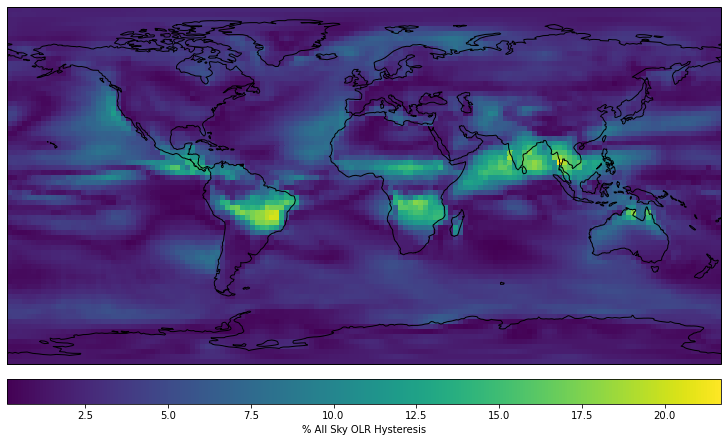

In [12]:
# --------------------------------
# Plotting the Reanalysis OLR Map
# --------------------------------

widths = [1]
fig = plt.figure(figsize=(10,7),constrained_layout=True)
gs = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths)    
 
#maxheight = 18

ax1 = fig.add_subplot(gs[0], projection=ccrs.PlateCarree())
ax1.coastlines()
C1 = ax1.pcolor(lon_long, lats, heights_frac_allsky, transform=ccrs.PlateCarree())
#if samescale:
#C1.set_clim(vmin=0,vmax=18)
#ax1.set_title('b - All Sky')
#ax1.set_xticks([lon_min, lon_min*0.5+lon_max*0.5, lon_max], crs=ccrs.PlateCarree())
#ax1.set_yticks([lat_min, lat_min*0.5+lat_max*0.5, lat_max], crs=ccrs.PlateCarree())
#lon_formatter = LongitudeFormatter(zero_direction_label=True)
#lat_formatter = LatitudeFormatter()
#ax1.xaxis.set_major_formatter(lon_formatter)
#ax1.yaxis.set_major_formatter(lat_formatter)
fig.colorbar(C1, ax=ax1, label='% All Sky OLR Hysteresis',fraction=0.3, orientation="horizontal")

path = '/Users/richa/OneDrive - Imperial College London/Documents/MIT/Project/Python/Figures/Cluster/'
#plt.savefig(path + 'all sky hysteresis fractional.png', bbox_inches='tight')